In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [32]:
dataset = pd.read_csv('D:/Git/ml_data.mining/data/indian_liver_patient.csv')
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [33]:
vals = dataset["Dataset"].unique()
vals

array([1, 2])

Нормализация

In [34]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler

scaler_mm = MinMaxScaler()

dataset[['nnAge', 'nnAlkaline_Phosphotase', 'nnAlamine_Aminotransferase', 'nnAspartate_Aminotransferase']] = scaler_mm.fit_transform(dataset[['Age', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase','Aspartate_Aminotransferase']])
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,nnAge,nnAlkaline_Phosphotase,nnAlamine_Aminotransferase,nnAspartate_Aminotransferase
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0.709302,0.060576,0.003015,0.001626
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0.674419,0.310699,0.027136,0.018296
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0.674419,0.208598,0.025126,0.011791
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0.627907,0.058134,0.002010,0.002033
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0.790698,0.064485,0.008543,0.009961


Удаление ненужнеых строк

In [35]:
dataset = dataset.drop(['Gender', 'Age','Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase'], axis=1)

Удаление пустых строк

In [36]:
dataset = dataset.dropna()

Тепловая карта

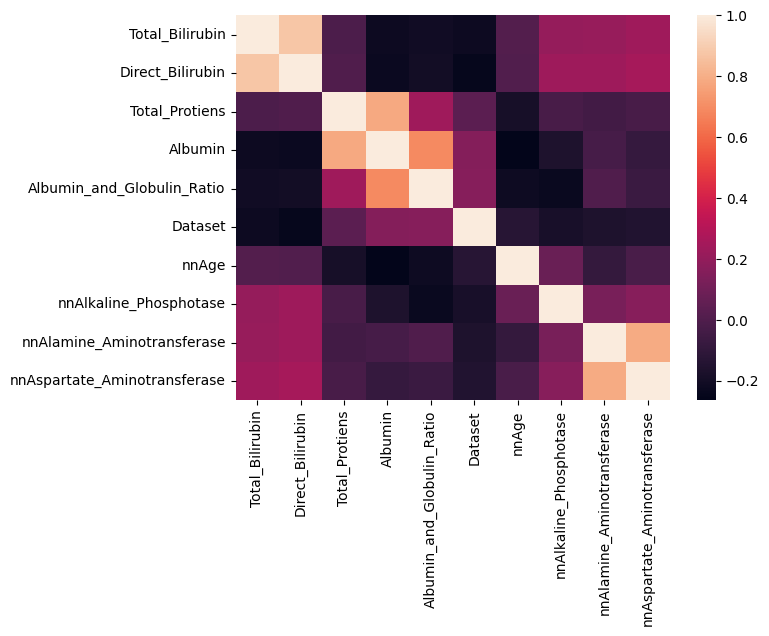

In [37]:
plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(numeric_only = True))
plt.show()

In [38]:
dataset.head()

,Total_Bilirubin,Direct_Bilirubin,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,nnAge,nnAlkaline_Phosphotase,nnAlamine_Aminotransferase,nnAspartate_Aminotransferase
0,0.7,0.1,6.8,3.3,0.90,1,0.709302,0.060576,0.003015,0.001626
1,10.9,5.5,7.5,3.2,0.74,1,0.674419,0.310699,0.027136,0.018296
2,7.3,4.1,7.0,3.3,0.89,1,0.674419,0.208598,0.025126,0.011791
3,1.0,0.4,6.8,3.4,1.00,1,0.627907,0.058134,0.002010,0.002033
4,3.9,2.0,7.3,2.4,0.40,1,0.790698,0.064485,0.008543,0.009961


In [39]:
cols_for_clusters = ['Total_Bilirubin', 'Direct_Bilirubin', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'nnAge', 'nnAlkaline_Phosphotase', 'nnAlamine_Aminotransferase', 'nnAspartate_Aminotransferase']

df= dataset[cols_for_clusters].copy()

In [40]:
df.head()

,Total_Bilirubin,Direct_Bilirubin,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,nnAge,nnAlkaline_Phosphotase,nnAlamine_Aminotransferase,nnAspartate_Aminotransferase
0,0.7,0.1,6.8,3.3,0.90,0.709302,0.060576,0.003015,0.001626
1,10.9,5.5,7.5,3.2,0.74,0.674419,0.310699,0.027136,0.018296
2,7.3,4.1,7.0,3.3,0.89,0.674419,0.208598,0.025126,0.011791
3,1.0,0.4,6.8,3.4,1.00,0.627907,0.058134,0.002010,0.002033
4,3.9,2.0,7.3,2.4,0.40,0.790698,0.064485,0.008543,0.009961


In [41]:
X = df
y = dataset['Dataset']

In [42]:
import mpl_toolkits.mplot3d
from sklearn.cluster import KMeans

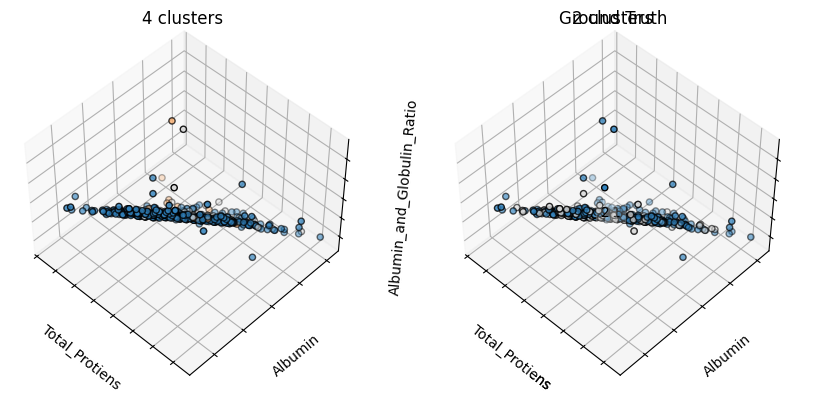

In [ ]:
estimators = [

    ("k_means_dataset_2", KMeans(n_clusters=2))
]

fig = plt.figure(figsize=(10, 8))
titles = ["4 clusters", "2 clusters"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(1, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["Total_Protiens"], X["Albumin"], X["Albumin_and_Globulin_Ratio"], c=labels.astype(float), cmap='tab20c', edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Total_Protiens")
    ax.set_ylabel("Albumin")
    ax.set_zlabel("Albumin_and_Globulin_Ratio")
    ax.set_title(title)

ax = fig.add_subplot(1, 2, 2, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1)]:
    ds = dataset[dataset["Dataset"]==name]
    ax.text3D(
        ds["Total_Protiens"].mean(),
        ds["Albumin"].mean(),
        ds["Albumin_and_Globulin_Ratio"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["Total_Protiens"], X["Albumin"], X["Albumin_and_Globulin_Ratio"], c=y, cmap='tab20c', edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Total_Protiens")
ax.set_ylabel("Albumin")
ax.set_zlabel("Albumin_and_Globulin_Ratio")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [44]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

n_clusters = np.arange(2, 21)

In [45]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.83
Adjusted Rand Index: -0.06


In [46]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n


In [47]:
best_metric

[0, 10000, 0, []]

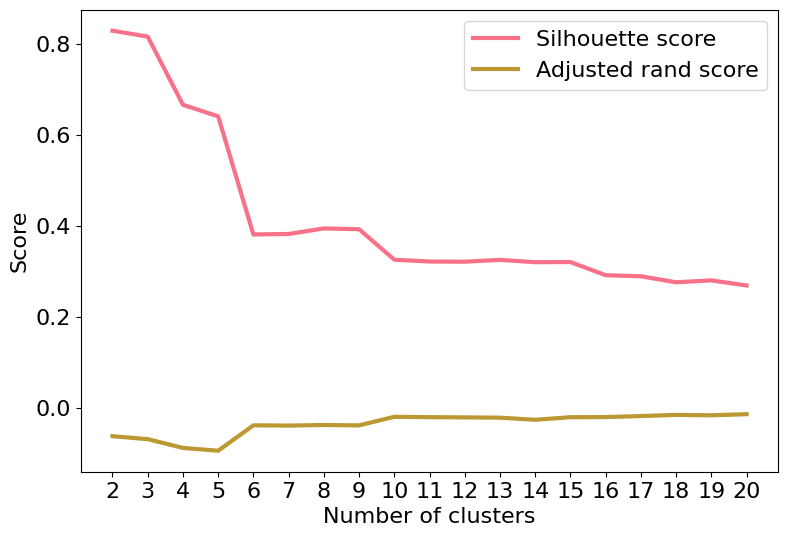

In [48]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

In [49]:
from scipy.cluster.hierarchy import linkage, dendrogram

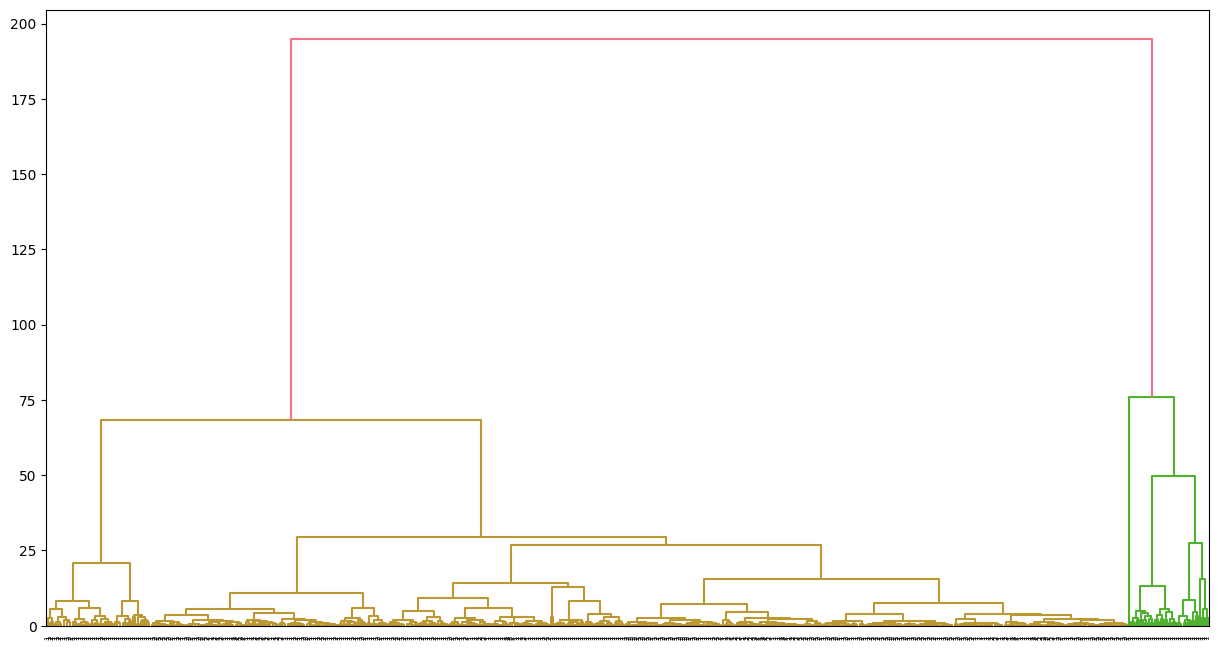

In [50]:
samples = df.values

mergings = linkage(samples, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

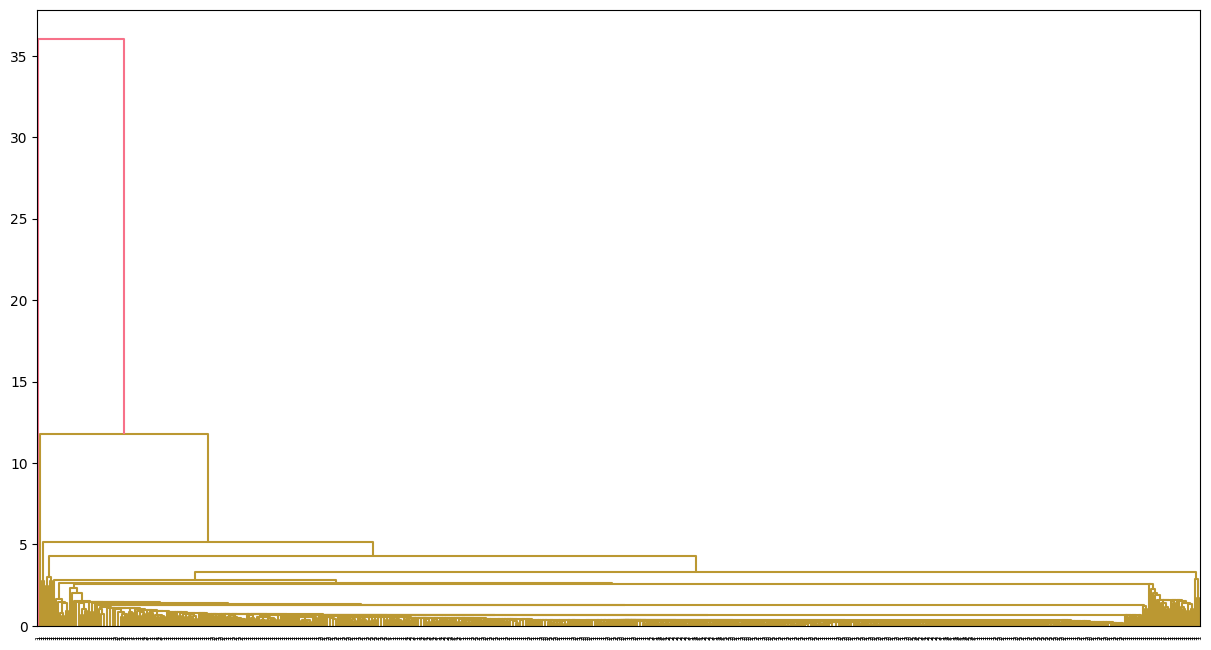

In [51]:
samples = df.values

mergings = linkage(samples, method='single')

plt.figure(figsize=(15, 8))
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

In [52]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import mutual_info_score

In [53]:
mins = X.shape[1]

In [54]:
db = DBSCAN(eps=0.8, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = ['#562C2C', '#F2542D', '#F5DFBB', '#0E9594', '#127475', '#FF1053', '#6C6EA0', '#66C7F4', '#C1CAD6', '#FFFFFF', '#462749', '#E086D3', '#9DA3A4', '#604D53', '#5B507A', '#A53860', '#FFA5AB', '#FFBA49', '#06A77D', '#E7A977']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["Sleep Duration"], xy["Quality of Sleep"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["Sleep Duration"], xy["Quality of Sleep"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


['#562C2C', '#F2542D', '#F5DFBB', '#0E9594', '#127475', '#FF1053', '#6C6EA0', '#66C7F4', '#C1CAD6', '#FFFFFF', '#462749', '#E086D3', '#9DA3A4', '#604D53', '#5B507A', '#A53860', '#FFA5AB', '#FFBA49', '#06A77D', '#E7A977']


KeyError: 'Sleep Duration'

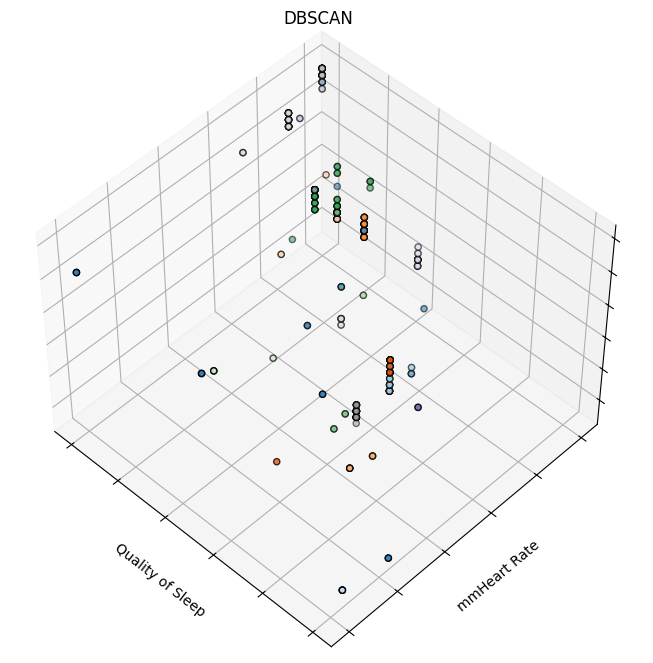

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["Quality of Sleep"], X["mmHeart Rate"], X["Sleep Duration"], c=labels.astype(float), cmap='tab20c', edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Quality of Sleep")
ax.set_ylabel("mmHeart Rate")
ax.set_zlabel("Sleep Duratioh")
ax.set_title("DBSCAN")

plt.show()

In [ ]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.72
Adjusted Rand Index: 0.50
